In [34]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_pyber_df = pd.merge(ride_data_df, city_data_df, how='outer', on='city')

# Display the data table for preview
combined_pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [35]:
# Create dataFrames based on city type
rural_df = combined_pyber_df.loc[combined_pyber_df["type"] == 'Rural', :]
urban_df = combined_pyber_df.loc[combined_pyber_df["type"] == 'Urban', :]
suburban_df = combined_pyber_df.loc[combined_pyber_df["type"] == 'Suburban', :]

#Group dataFrames by city
grouped_rural_city_df = rural_df.groupby(['city'])
grouped_urban_city_df = urban_df.groupby(['city'])
grouped_suburban_city_df = suburban_df.groupby(['city'])


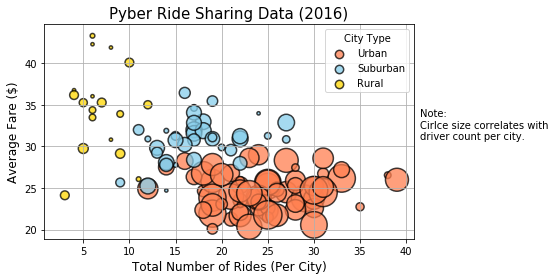

In [36]:
#Average Fare vs. Total Rides Scatter

urban_fare = plt.scatter(grouped_urban_city_df['ride_id'].count(), grouped_urban_city_df['fare'].mean(), marker="o", linewidths=1.5, c='coral', edgecolors="black", s=(grouped_urban_city_df['driver_count'].first())*11, alpha=.75, label='Urban')
suburban_fare = plt.scatter(grouped_suburban_city_df['ride_id'].count(), grouped_suburban_city_df['fare'].mean(), marker="o",linewidths=1.5, c='skyblue', edgecolors="black", s=(grouped_suburban_city_df['driver_count'].first())*11, alpha=.75, label='Suburban')
rural_fare = plt.scatter(grouped_rural_city_df['ride_id'].count(), grouped_rural_city_df['fare'].mean() , marker="o",linewidths=1.5, c='gold', edgecolors="black", s=(grouped_rural_city_df['driver_count'].first())*11, alpha=.75, label='Rural')

#Legend
lgnd=plt.legend(handles=[urban_fare, suburban_fare, rural_fare], title='City Type')
#Set legend marker size
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

#Format plot and titles
plt.grid()
plt.xlabel('Total Number of Rides (Per City)', size='12')
plt.ylabel('Average Fare ($)', size='12')
plt.figtext(0.98, 0.5, 'Note:\nCirlce size correlates with\ndriver count per city.')
plt.title('Pyber Ride Sharing Data (2016)', size='15')
plt.tight_layout()
plt.savefig('Pyber_Ride_Share_Data_2016.png')
plt.show()



## Total Fares by City Type

In [37]:
#Groupby City Type

city_type_groupby_df = combined_pyber_df.groupby(['type'])
#city_groupby_df = combined_pyber_df.groupby(['type', 'city'])


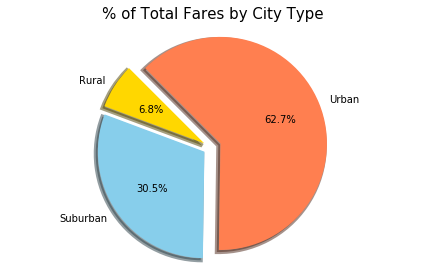

In [38]:
#Plot pie chart % Total Fares by City Type

plt.pie(city_type_groupby_df['fare'].sum(), explode=(0.07, 0.07, 0.1), labels = ['Rural', 'Suburban', 'Urban'], colors=['gold', 'skyblue', 'coral'], autopct="%1.1f%%", wedgeprops={'linewidth': 4}, shadow=True, startangle=135)

#Format Chart
plt.axis('equal')
plt.title('% of Total Fares by City Type', size='15')
plt.tight_layout()
plt.savefig('Total_Fares_by_City_Type.png')
plt.show()

## Total Rides by City Type

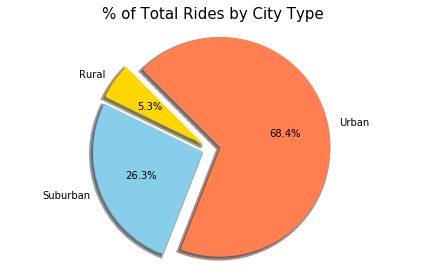

In [39]:
#Plot pie chart Total Ride by City Type
plt.pie(city_type_groupby_df['ride_id'].count(), explode=(0.07, 0.07, 0.1), labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'skyblue', 'coral'], autopct="%1.1f%%", wedgeprops={'linewidth': 4}, shadow=True, startangle=135)

#Format Chart
plt.axis('equal')
plt.title('% of Total Rides by City Type', size='15')
plt.tight_layout()
plt.savefig('Total_Rides_by_City_Type.png')
plt.show()

## Total Drivers by City Type

In [40]:
#Group by type and sum driver count using city_data_df
city_type_grouped = city_data_df.groupby(['type']).sum()

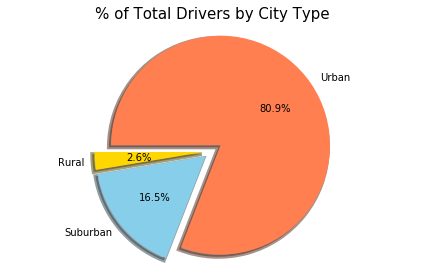

In [41]:
#Plot pie chart Total Ride by City Type
plt.pie(city_type_grouped['driver_count'], explode=(0.07, 0.07, 0.1), labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'skyblue', 'coral'], autopct="%1.1f%%", wedgeprops={'linewidth': 4}, shadow=True, startangle=180)

#Format Chart
plt.axis('equal')
plt.title('% of Total Drivers by City Type', size='15')
plt.tight_layout()
plt.savefig('Total_Drivers_by_City_Type.png')
plt.show()